<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2018-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a>fbarbeiro@uoc.edu</a></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2: Redes Neuronales Convolucionales con KERAS

En esta práctica vamos a implementar dos redes neuronales convolucionales para reconocer los dígitos del conjunto de datos de referencia MNIST. Además, entrenaremos también un modelo sencillo de super-resolución. En concreto se implementarán los siguientes tres puntos:

1. Una red neuronal convolucional de una capa
2. Una red neuronal convolucional profunda con x capas
3. Un modelo de super-resolución

En los tres casos se utilizará la librería Keras para la implementación del modelo, la compilación y el entrenamiento. A continuación utulizaremos también Keras para predecir la clasificación de imágenes del conjunto de test.

**Importante: Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

# 0 Inicialización y carga de datos

El siguiente código carga los paquetes necesarios para la práctica y además lee los datos que utilizaremos para entrenar la red neuronal. El Dataset MNIST corresponde a imágenes de digitos del 0 al 9 de tamaño 28x28 píxels.

In [29]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D
import matplotlib.pyplot as plt


In [2]:
# Descarga de el dataset MNIST y hace la partición train/test
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

11493376/11490434 [==============================] - 28s 2us/step


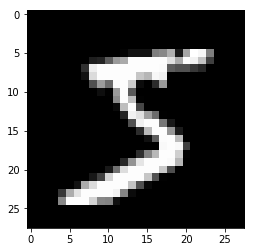

In [3]:
#Visualizamos la primera imagen del dataset
first_image = x_train_orig[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
# Comprobación del tamaño de la imagen
x_train_orig[0].shape

(28, 28)

## 1. Red Neuronal Convolucional de una capa [4 puntos]


A continuación implementaremos una red neuronal convolucional de una capa y haremos el entrenamiento y test sobre el dataset MNIST. Tenemos 60000 imágenes para entrenar y 10000 para testear. 

### 1.1 Pre-procesado de datos

El primer paso para entrenar una red neuronal consiste en pre-procesar los datos de entrenamiento y test para que cuadren con el input de la red neuronal.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Ajustar el tamaño de los datos de entrenamiento y test utilizando 4 dimensiones (la última dimnesión tiene que ser 1 para indicar que las imágenes están en escala de grises). TIP: utilitar el número de datos de entrenamiento y test y el tamaño de las imágenes.
</div>

In [33]:
num_pixels

784

In [34]:
# Usando TIP: ([0] - numero imagenes, [28, 28, 1] - tamaño, gris)

x_train = x_train_orig.reshape(x_train_orig.shape[0], 28, 28, 1).astype('float32')
x_test = x_test_orig.reshape(x_test_orig.shape[0], 28, 28, 1).astype('float32')

# Normalizando de 0-255 a 0-1
x_train = x_train / 255
x_test = x_test / 255

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Codificar los valores de las etiquetas de salida en un vector one-hot. Por ejemplo, el vector de salida para una imagen que contiene un 5 sería: [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]. TIP: se puede utilizar la función to_categorical de Keras.utils. 
</div>

In [35]:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

# Lo sé que está definida num_classes abajo, esa es para confirmación
num_classes = y_test.shape[1]
print(num_classes)

10


### 1.2 Creación del modelo


Vamos a usar un modelo Secuencial de Keras ya que es muy fácil de utilizar. Este tipo de modelos nos permiten construir el modelo capa a capa. En concreto:

- La primera capa que añadiremos será una capa convolucional con las siguientes propiedades: 
    - Número de kernels (neuronas) primera capa: 64 neuronas
    - Tamaño de los kernels: 3x3
    - Activacion de los kernels: ReLU
- A continuación añadiremos una capa Flatten para conectar la salida de la capa convolucional con la entrada de una capa densa.
- Por último, añadiremos una capa densa de salida, y por lo tanto tendrá tantas neuronas como clases queremos predecir. La activación de esta última capa sera Softmax. La predicción final del modelo será entonces la clase que tenga una probabilidad más alta. 


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [2 pts.]:</strong> Construir el modelo según los requerimientos indicados.
</div>

In [36]:
# Comentado el num_classes pq fue definido arriba
# num_classes = 10

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

### 1.3 Compilación el modelo

Una vez definido el modelo se tiene que compilamos para que Keras prepare el entrenamiento. Para ello vamos a utilizar el algoritmo de optimización ADAM, la función de coste "categorical_crossentropy" y la métrica "accuracy"

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 1.4 Entrenamiento del modelo

Entrenamos ahora el modelo. Para ello haremos que el modelo vea cada imagen 9 veces distintas, y utilizaremos el conjunto de test para la validación del proceso.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Entrenar el modelo durante 9 epochs.
</div>

In [38]:
#Entrenamiento del modelo
n_epochs_onelayer = 9
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=n_epochs_onelayer, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 21s 354us/step - loss: 0.2633 - acc: 0.9266 - val_loss: 0.1079 - val_acc: 0.9685
Epoch 2/9
60000/60000 [==============================] - 21s 351us/step - loss: 0.0863 - acc: 0.9755 - val_loss: 0.0708 - val_acc: 0.9774
Epoch 3/9
60000/60000 [==============================] - 20s 341us/step - loss: 0.0585 - acc: 0.9830 - val_loss: 0.0624 - val_acc: 0.9814
Epoch 4/9
60000/60000 [==============================] - 20s 336us/step - loss: 0.0463 - acc: 0.9863 - val_loss: 0.0611 - val_acc: 0.9801
Epoch 5/9
60000/60000 [==============================] - 20s 337us/step - loss: 0.0370 - acc: 0.9890 - val_loss: 0.0585 - val_acc: 0.9815
Epoch 6/9
60000/60000 [==============================] - 20s 336us/step - loss: 0.0320 - acc: 0.9904 - val_loss: 0.0569 - val_acc: 0.9827
Epoch 7/9
60000/60000 [==============================] - 20s 337us/step - loss: 0.0257 - acc: 0.9925 - val_loss: 0.0621 - 

### 1.5  Evolución de la precisión

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Visualizar la evolución del accuracy en el conjunto de entrenamiento y de test en función de las épocas.
</div>

In [ ]:
## TODO: plot del training loss y el accuracy
def plot_prediction(n_epochs, mfit):

    
    return plt

In [ ]:
plot_prediction(n_epochs_onelayer, mfit_onelayer)

### 1.4 Predicción

Finalmente podemos hacer la predicción para cuatro de las imágenes del conjunto de test y mirar si los resultados son o no correctos

In [ ]:
# Hacemos la predicción para las 4 primeras imágenes del set de test
print(model.predict(x_test[:4]))

# Mostramos el ground truth para las primeras 4 imágenes
y_test[:4]

## 2. Deep CNN + Dropout [3 puntos]

En el ejercicio anterior hemos implementado una red convolucional de una sola capa. Ahora vamos a implementar una red neuronal convolucional profunda y veremos como ésto se traduce en un mejor rendimiento en los resultados. Primero inicializaremos y pre-procesaremos los datos. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Codificar los valores de las etiquetas de salida en un vector one-hot. TIP: se puede utilizar la función to_categorical de Keras.utils. 
</div>

In [ ]:
y_train = None
y_test = None

En este caso volveremos a utilizar un modelo Sequential de Keras que constará de: 
- Dos capas de convolución de 32 y 64 kernels respectivamente de tamaño 3x3, y con función de activación relu
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.25
- Una capa Flatten
- Una capa densa con 128 neuronas y función de activación relu
- Una capa de Dropout con un rate=0.5
- Una capa densa con función de activación softmax

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1,5 pts.]:</strong> Implementar la arquitectura de la red neuronal con las características indicadas.
</div>

In [ ]:
##TODO construir la red neuronal


A continuación compilamos, entrenamos y evaluamos el modelo. Para la compilación volveremos a utilizar la función de coste "categorical_crossentropy" y la métrica "accuracy", pero en este caso utilizaremos el optimizador Adadelta.

El entrenamiento del modelo lo haremos durante 12 épocas, utilizando un batch_size de 128, y el conjunto de test para validar. Finalmente utilizaremos también el conjunto de test para evaluar el modelo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Entrenar el modelo durante 12 épocas, con un batch_size de 128, y el conjunto de test como validación. La función de coste tiene que ser "categorical_crossentropy", el optimizador Adadelta i hay que mostrar la métrica "accuracy".
</div>

In [ ]:
batch_size = None
n_epochs = None 

model.compile(None) 

mfit = None 


#Evaluación el modelo sobre el conjunto de test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
# Visualizción de la evolución de la métrica accuracy
plot_prediction(n_epochs, mfit)

In [ ]:
#Predecir las cuatro primeras imágenes del conjunto de test
print(model.predict(x_test[:4]))
y_test[:4]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis [0,5 pts.]:</strong> Analizar los resultados obtenidos y la variación del tiempo de entrenamiento entre el modelo de una capa y el de diversas capas. Comentar posibles mejoras del modelo.
</div>

## 3. CNN aplicada a super resolución de imágenes [3 puntos]

En este ejercicio construiremos una red neuronal convolucional tal que, dadas unas imágenes de baja resolución, nos permita obtener las mismas imágenes pero con una resolución más alta. Para ello, a partir del mismo conjunto de datos MNIST crearemos imágenes de baja resolución con las cuales vamos a entrenar nuestro modelo. 

En primer lugar reducimos la resolución de las imágenes:

In [ ]:
x_train = x_train_orig[:, ::2, ::2]
x_test = x_test_orig[:, ::2, ::2]

Y normalizamos los valores de los píxeles y ajustamos las dimensiones de los datos:

In [ ]:
# Normalizamos los valores de los píxeles
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = x_train_orig / 255.0
y_test = x_test_orig / 255.0

# Ajustamos las dimensiones de los datos
x = np.expand_dims(x_train, axis=3)
y = np.expand_dims(y_train, axis=3)

### 3.1 Creación y entrenamiento del modelo


A continuación crearemos y entrenaremos el modelo con las siguientes características:

- Una capa convolucional de 32 kernels de tamaño 3x3, y con función de activación relu.
- Una capa de MaxPooling con un tamaño de 2x2.
- Otra capa convolucional de 32 kernels de tamaño 3x3, y con función de activación relu.
- Una capa deconvolucional con 32 kernels, de tamaño 3x3, stride 2x2, y función de activación relu.
- Una última capa deconvolucional con un único kernel de tamaño 3x3, stride 2x2, y función de activación sigmoid.

Todas las capas convolucionales y deconvolucionales tienen que tenen el parámetro padding "sames", de forma que el tamaño de las imágenes no se vea afectado en estas capas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [2 pts.]:</strong> Crear y entrenar el modelo según las características indicadas. Podéis probar diferentes números de épocas para intentar obtener los mejores resultados posibles.
</div>

In [ ]:
##TODO: Creación del modelo




#Entrenar y compilar el modelo
model.compile(None)
model.fit(None)

### 3.2 Predicción de algunas imágenes del conjunto de test

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1 pto.]:</strong> Visualizar tres imágenes al azar del conjunto de test. Mostrar la versión original de la imagen, la versión con resolución reducida, y la predicción del modelo.
</div>

In [ ]:
# Predicción de tres imágenes del conjunto de test
n_images = None
idx_images = np.random.randint(x_test.shape[0], size=n_images)

images = np.expand_dims(np.stack([x_test[i] for i in idx_images]), axis=3)

pred = model.predict(images)

# Ajustamos las dimensiones de las imágenes predichas al formato adecuado y desnormalizamos los píxeles
pred = None

##TODO: Visualización de las imágenes predichas
